<a href="https://colab.research.google.com/github/yulrio/PML/blob/main/2_7_HPP_NN_512_256_128_tanh_001_adam_huber_loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load The Library

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

print(tf.__version__)

2.8.0


# Load The Housing Price Prediction Data

In [2]:
(train_features, train_labels), (test_features, test_labels) = tf.keras.datasets .boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [3]:
# Dimension of the dataset
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
train_features = preprocessing.normalize(train_features)
test_features = preprocessing.normalize(test_features)

In [5]:
print(train_features[0])
print(train_labels[0])

[0.0024119  0.         0.01592969 0.         0.00105285 0.01201967
 0.17945359 0.00778265 0.00782786 0.6007879  0.04109624 0.77671895
 0.03663436]
15.2


In [6]:
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[len(train_features[0])]),
        tf.keras.layers.Dense(512, activation='tanh'),
        tf.keras.layers.Dense(256, activation='tanh'),
        tf.keras.layers.Dense(128, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss='huber_loss', metrics=['mae', 'mse'])
    model.summary()

    return model

In [7]:
model = build_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 13)                0         
                                                                 
 dense (Dense)               (None, 512)               7168      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 171,521
Trainable params: 171,521
Non-trainable params: 0
_________________________________________________________________


In [8]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<1.5):
      print("\nMAE pembelajaran telah lebih kecil dari  1.5  sehingga pelatihan dihentikan!")
      self.model.stop_training = True
callbacks = myCallback()

In [9]:
history = model.fit(train_features, train_labels, epochs=2000, verbose=2, 
                    validation_data=(test_features,test_labels),
                    callbacks=callbacks)

Epoch 1/2000
13/13 - 6s - loss: 15.8764 - mae: 16.3736 - mse: 371.3062 - val_loss: 9.9019 - val_mae: 10.3970 - val_mse: 168.5989 - 6s/epoch - 447ms/step
Epoch 2/2000
13/13 - 0s - loss: 7.7699 - mae: 8.2576 - mse: 132.1971 - val_loss: 7.9416 - val_mae: 8.4380 - val_mse: 121.9750 - 105ms/epoch - 8ms/step
Epoch 3/2000
13/13 - 0s - loss: 6.7631 - mae: 7.2533 - mse: 107.4203 - val_loss: 7.0284 - val_mae: 7.5095 - val_mse: 104.3309 - 125ms/epoch - 10ms/step
Epoch 4/2000
13/13 - 0s - loss: 6.2479 - mae: 6.7245 - mse: 95.8123 - val_loss: 6.4839 - val_mae: 6.9617 - val_mse: 94.5041 - 88ms/epoch - 7ms/step
Epoch 5/2000
13/13 - 0s - loss: 6.0953 - mae: 6.5726 - mse: 89.9919 - val_loss: 6.2229 - val_mae: 6.7011 - val_mse: 89.4931 - 101ms/epoch - 8ms/step
Epoch 6/2000
13/13 - 0s - loss: 6.0436 - mae: 6.5223 - mse: 87.3877 - val_loss: 6.1465 - val_mae: 6.6215 - val_mse: 87.8438 - 103ms/epoch - 8ms/step
Epoch 7/2000
13/13 - 0s - loss: 6.0322 - mae: 6.5139 - mse: 86.8154 - val_loss: 6.1490 - val_mae: 

In [10]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [11]:
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
791,1.133523,1.522896,5.682801,3.189337,3.632383,34.381954,791
792,1.124562,1.508626,5.548395,3.137367,3.573017,33.581314,792
793,1.118740,1.506413,5.573881,3.207153,3.648461,34.296257,793
794,1.122443,1.503400,5.663716,3.149860,3.592531,33.638847,794
795,1.111614,1.493737,5.495581,3.152359,3.592426,33.928856,795


# Evaluation

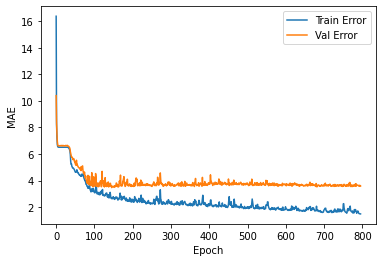

In [16]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.legend()
plot_history()

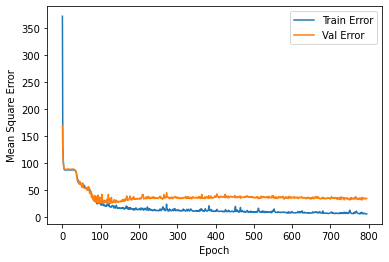

In [17]:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.legend()
plot_history()

# Predict

In [14]:
def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  _ = plt.plot([-100, 100],[-100,100])

  plt.figure()
  error = test_predictions - test_labels
  plt.hist(error, bins = 50)
  plt.xlabel("Prediction Error")
  _ = plt.ylabel("Count")

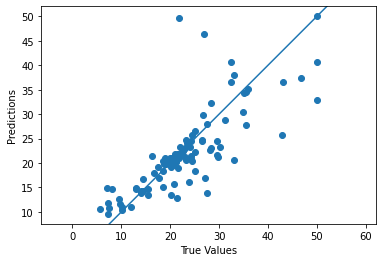

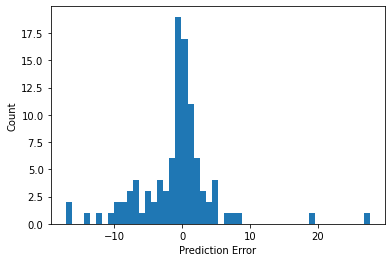

In [15]:
test_predictions = model.predict(test_features).flatten()
plot_prediction(test_labels, test_predictions)